# **📜 SVM Implementation**

**Name:** `JARANILLA, Yul Jhon O.`<br/>
**Course:** `IT325 - Elective 2 (Machine Learning)` <br/>
**Program:** `BS Information Technology`


## **Context**

Mushroom hunting, also known as "shrooming," has seen a resurgence in popularity in recent years. Despite this renewed interest, <b> identifying whether a mushroom is edible or poisonous remains a critical skill due to the significant health risks </b> associated with consuming toxic species.

The dataset in this study, originally contributed to the UCI Machine Learning repository nearly 30 years ago, includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. These descriptions were drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is classified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. The latter class was combined with the poisonous category due to the inherent risks involved.

<b> This highlights that there is no simple rule for determining the edibility of a mushroom. </b> Unlike plants such as Poison Ivy, which can be identified with a simple mnemonic ("leaflets three, let it be"), mushrooms require a more nuanced and detailed analysis. This underscores the necessity for a reliable and accurate method to distinguish between edible and poisonous mushrooms.

<b>Accurate classification of mushrooms is not only a matter of culinary interest but also a public health concern.</b> Poisonous mushrooms contain toxins that can cause a range of symptoms, from gastrointestinal discomfort to severe organ failure and death. Notably, amatoxins, found in certain poisonous mushrooms, can inhibit RNA polymerase II, leading to liver and kidney failure <a href="https://www.foodsafetynews.com/2019/05/immigrants-face-higher-risks-for-poisoning-from-foraging-wild-foods/">(Food Safety News)​​</a> <a href="https://www.readkong.com/page/foodborne-disease-outbreaks-in-the-philippines-2005-2018-3092944">(ReadKong)</a>​.

In the Philippines, several incidents underscore the critical need for effective mushroom classification:

- <b>Bohol Incident (2018).</b> In May 2018, two children died, and four others were hospitalized in Bohol after consuming wild mushrooms that were later identified as poisonous. The tragic incident highlighted the dangers of misidentifying wild mushrooms and the urgent need for public education on safe foraging practices​ (GMA Network | News and Entertainment )​.
- <b>Bukidnon Incident (2021)</b> In June 2021, three members of a family in Bukidnon died after consuming mushrooms they had foraged. The mushrooms were later found to contain lethal toxins, emphasizing the fatal consequences of incorrect mushroom identification​ (ReadKong)​.

These incidents illustrate the consequences of consuming misidentified mushrooms and reinforce the importance of developing robust, reliable methods for mushroom classification. The goal of this study is to utilize the dataset to identify key characteristics that can distinguish between edible and poisonous mushrooms with high certainty, thereby potentially preventing future tragedies.

By understanding which features spell certain death and which are most palatable, this study aims to enhance the safety of mushroom foraging, contributing to public health and safety. The development of accurate models for mushroom classification can provide valuable tools for both amateur and professional foragers, helping to mitigate the risks associated with this popular activity.



**Data**
<b> Attribute Information: </b>
- e = Edible
- p = Poisonous


- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d



**Citation**

- Beach, C. (2019, May 31). Immigrants face higher risks for poisoning from foraging wild foods | Food Safety News. Food Safety News. https://www.foodsafetynews.com/2019/05/immigrants-face-higher-risks-for-poisoning-from-foraging-wild-foods/
- Foodborne disease outbreaks in the Philippines (2005-2018) - Philippine Journal . . . (n.d.). https://www.readkong.com/page/foodborne-disease-outbreaks-in-the-philippines-2005-2018-3092944
- Mushroom classification. (2016, December 1). https://www.kaggle.com/datasets/uciml/mushroom-classification 

## **🔃 Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.utils import resample



## **📩 Load Dataset**

In [2]:
# Define the Class for Bagging Classifier

class BaggingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model1, model2, model3, n_estimators=10, random_state=None):
        self.model1 = model1
        self.model2 = model2
        self.model3 = model3
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.models = []
        self.bootstrap_samples = []

    def bootstrap_sample(self, X, y):
        self.bootstrap_samples = [
            resample(X, y, replace=True, random_state=self.random_state+i) for i in range(self.n_estimators)
        ]

    def fit(self, X, y):
        self.bootstrap_sample(X, y)
        self.models = []

        for i, (X_sample, y_sample) in enumerate(self.bootstrap_samples):
            model1_clone = clone(self.model1)
            model2_clone = clone(self.model2)
            model3_clone = clone(self.model3)

            model1_clone.fit(X_sample, y_sample)
            model2_clone.fit(X_sample, y_sample)
            model3_clone.fit(X_sample, y_sample)

            self.models.append((model1_clone, model2_clone, model3_clone))

    def predict(self, X):
        predictions = np.zeros((self.n_estimators, X.shape[0], 3), dtype=object)

        for i, (model1, model2, model3) in enumerate(self.models):
            predictions[i, :, 0] = model1.predict(X)
            predictions[i, :, 1] = model2.predict(X)
            predictions[i, :, 2] = model3.predict(X)

        majority_vote = np.apply_along_axis(
            lambda x: Counter(x).most_common(1)[0][0], axis=1, arr=predictions.reshape(-1, 3)
        ).reshape(self.n_estimators, -1).T

        return np.apply_along_axis(
            lambda x: Counter(x).most_common(1)[0][0], axis=1, arr=majority_vote
        )

    def predict_proba(self, X):
        probas = np.zeros((self.n_estimators, X.shape[0], 3, len(np.unique(self.bootstrap_samples[0][1]))))

        for i, (model1, model2, model3) in enumerate(self.models):
            probas[i, :, 0, :] = model1.predict_proba(X)
            probas[i, :, 1, :] = model2.predict_proba(X)
            probas[i, :, 2, :] = model3.predict_proba(X)

        avg_proba = np.mean(probas, axis=(0, 2))
        return avg_proba

    def score(self, X, y):
        return np.mean(self.predict(X) == y)
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)
        return accuracy, precision, recall, f1, conf_matrix, classification_rep

In [3]:
file_path = 'mushrooms.csv'
mushrooms = pd.read_csv(file_path)
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## **🔎 Examine Dataset (EDA)**
- Check for cells with null values.
- Perform 5 descriptive analysis.
- Perform 2 multivariate analysis.

In [4]:
# EDA - 1.0 Check for cells with null values

null_values = mushrooms.isnull().sum()
null_values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
# EDA - 2.0  Descriptive Statistics

desc_stats = mushrooms.describe(include='all')
desc_stats

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


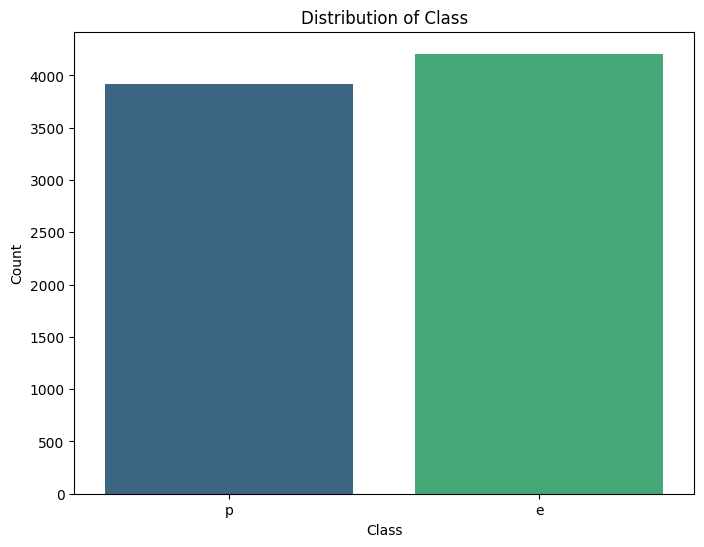

In [6]:
# EDA - 2.1 Distribution of Class (Edible vs. Poisonous)

plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=mushrooms, palette='viridis', hue='class', dodge=False)
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The 'class' column represents whether a mushroom is poisonous (p) or edible (e). The count plot shows the distribution of these two classes. We observe that the dataset is balanced with an almost equal number of poisonous and edible mushrooms. This balance is crucial for training a model to distinguish between the two classes effectively.

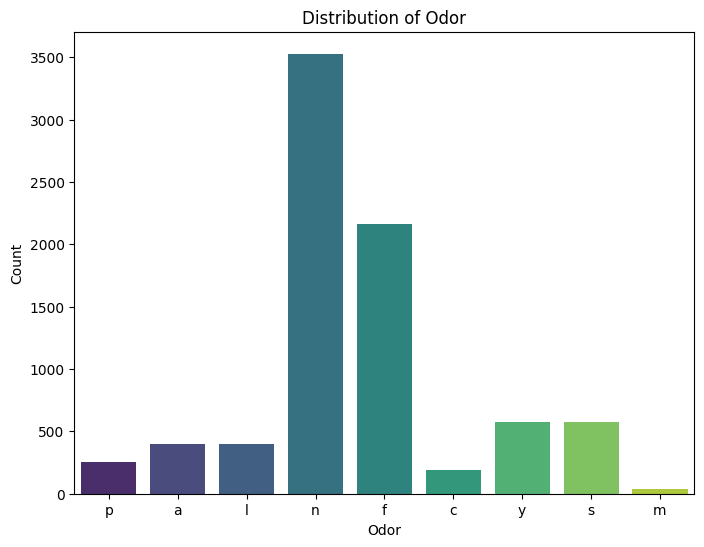

In [7]:
# EDA - 2.2 Countplot of Odor

plt.figure(figsize=(8, 6))
sns.countplot(x='odor', data=mushrooms, palette='viridis', hue='odor', dodge=False)
plt.title('Distribution of Odor')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.show()

The 'odor' column describes the smell of the mushroom. The plot shows that 'n' (none) is the most common odor, followed by 'f' (foul) and 'y' (fishy) together with 's' (spicy). Odor is a significant feature because certain odors like 'foul' or 'fishy' can be strong indicators of poisonous mushrooms.


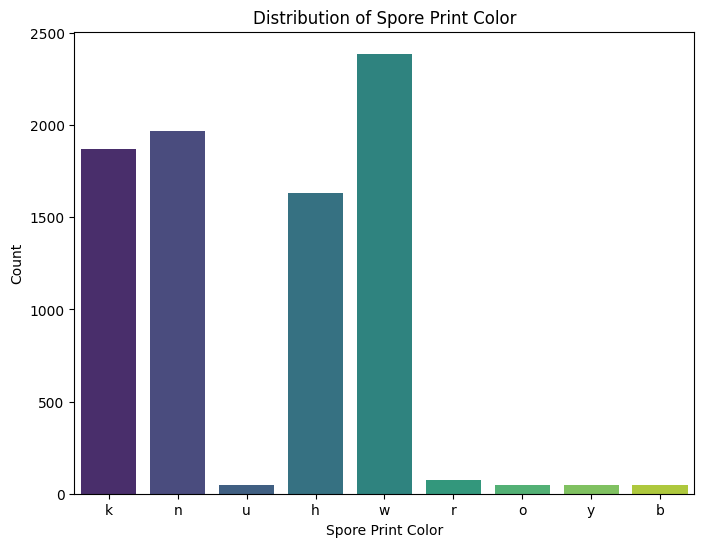

In [8]:
# EDA - 2.3 Distribution of Spore Print Color

plt.figure(figsize=(8, 6))
sns.countplot(x='spore-print-color', data=mushrooms, palette='viridis', hue='spore-print-color', dodge=False)
plt.title('Distribution of Spore Print Color')
plt.xlabel('Spore Print Color')
plt.ylabel('Count')
plt.show()

The 'spore-print-color' column describes the color of the mushroom's spore print. The plot shows that 'w' (white) is the most common spore print color, followed by 'n' (brown) and 'k' (black). The spore print color can be an important feature in identifying specific species of mushrooms, which may relate to their edibility.

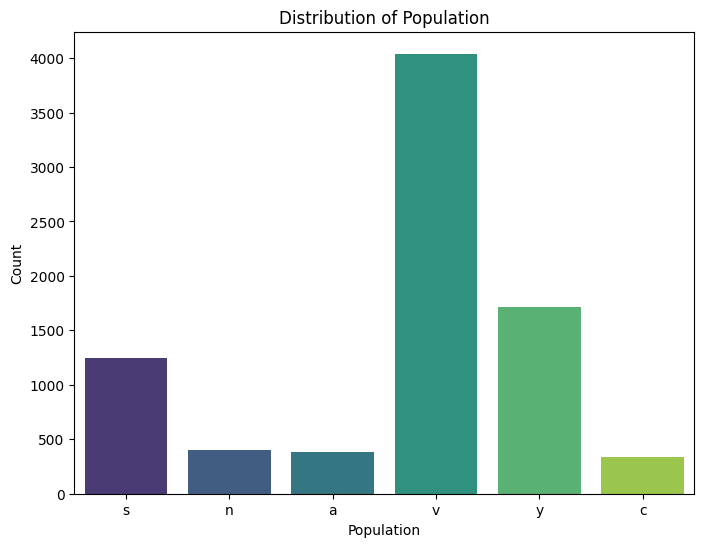

In [9]:
# EDA - 2.4 Distribution of Population

plt.figure(figsize=(8, 6))
sns.countplot(x='population', data=mushrooms, palette='viridis', hue='population', dodge=False)
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()


The 'population' column describes the abundance of the mushrooms in their habitat. The plot shows that 'v' (several) is the most common population size, followed by 'y' (solitary) and 's' (scattered). The population size can impact classification as certain species may only be found in specific population sizes, which can help in identifying them.


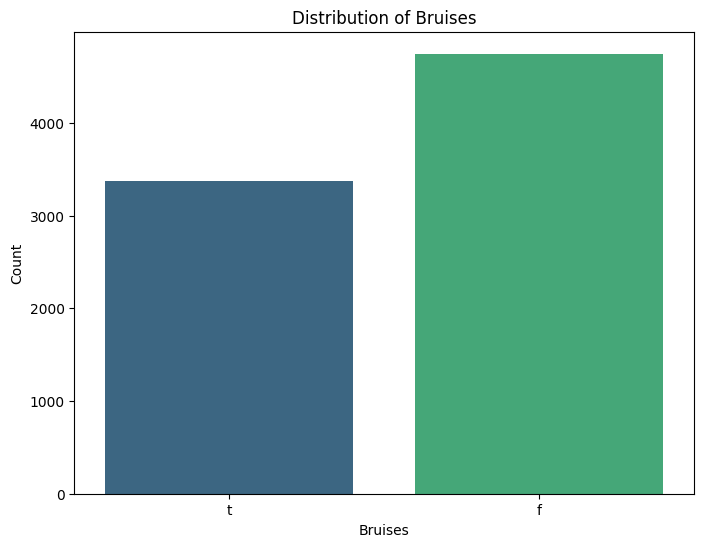

In [10]:
# EDA - 2.5 Distribution of Bruises

plt.figure(figsize=(8, 6))
sns.countplot(x='bruises', data=mushrooms, palette='viridis', hue='bruises', dodge=False)
plt.title('Distribution of Bruises')
plt.xlabel('Bruises')
plt.ylabel('Count')
plt.show()


The 'bruises' column shows whether the mushroom bruises ('t' for true, 'f' for false). The plot shows that mushrooms that do not bruise ('f') are slightly more common than those that do ('t'). This can be an important feature for classification.


<b>There is no need for multivariate analysis. </b> The data are categorical and univariate analysis of distributions is usually sufficient. Multivariate analysis is often used to understand the relationships between multiple variables simultaneously. It is particularly useful when dealing with continuous data where interactions and correlations can significantly impact the outcomes.

<b>In this dataset, all features are categorical. </b> The primary goal is classification, where the focus is on understanding the distribution of each categorical feature and its relationship with the target variable ('class'). Since each feature can be effectively analyzed using univariate analysis (i.e., examining the distribution of individual features), and the relationships between features and the target can be captured through the classification model, multivariate analysis is less critical. Instead, encoding these categorical variables into a numerical format suitable for machine learning algorithms (as done with LabelEncoder) is sufficient.

## **🧹 Prepare Dataset**
- Identify the `predictor` and the `target` variables.
- Split the dataset for `train` and test `sets`.

In [11]:
# Convert categorical features to numerical values using LabelEncoder:

label_encoders = {}
for column in mushrooms.columns:
    le = LabelEncoder()
    mushrooms[column] = le.fit_transform(mushrooms[column])
    label_encoders[column] = le

In [12]:
# Load and Prepare the Dataset

X = mushrooms.drop('class', axis=1)
y = mushrooms['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **🤖 Train Model**
- Bagging Method

In [13]:
# Initialize the models

model1 = DecisionTreeClassifier()
model2 = SVC(probability=True)
model3 = KNeighborsClassifier()

# Create the Bagging Classifier

bagging_clf = BaggingClassifier(
    model1=model1,
    model2=model2,
    model3=model3,
    n_estimators=10,
    random_state=42
)

# Train the Bagging Classifier

bagging_clf.fit(X_train, y_train)


## **📝 Evaluate Model Performance**
- Derive classification metrics from confusion matrix.

In [14]:
accuracy, precision, recall, f1, conf_matrix, classification_rep = bagging_clf.evaluate(X_test, y_test)

print("Confusion Matrix:\n", conf_matrix)
print("\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("\n")
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[1256    1]
 [   1 1180]]


Accuracy: 0.9991796554552912
Precision: 0.9991796554552912
Recall: 0.9991796554552912
F1-score: 0.9991796554552912


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## 🔢 **Discussion of Results**


<b> Assumptions </b><br/>
- The dataset is assumed to be relatively balanced in terms of the number of edible and poisonous mushrooms. This balance helps the model to learn effectively and avoid bias towards one class.

- The 30% test size is assumed to be representative of the overall dataset, ensuring that the distribution of features and classes in the test set is similar to that in the training set.

- The use of label encoding for categorical features is assumed to be effective for the Bagging Classifier model. This encoding converts categorical variables into a numerical format that the model can process.

- The assumption is that using three diverse models (DecisionTreeClassifier, SVC, and KNeighborsClassifier) in a bagging approach provides a robust ensemble that leverages the strengths of each model type.

- The high performance metrics suggest that the impact of outliers in this dataset is minimal or well-managed by the model.


<b> Observations </b><br/>
- The Bagging Classifier achieved an accuracy of 99.92%, significantly higher than the SVM model's 96.1%. This indicates that the Bagging Classifier is extremely effective in distinguishing between edible and poisonous mushrooms.

- With a precision of 99.92%, the model is highly accurate in its positive predictions. When the model predicts a mushroom to be poisonous, it is correct 99.92% of the time. This is crucial for minimizing false positives and ensuring confidence in the predictions.

- The recall of 99.92% indicates that the model successfully identifies 99.92% of all actual poisonous mushrooms. This high recall ensures that most poisonous mushrooms are correctly identified, reducing the risk of mistakenly consuming a poisonous mushroom.

- The F1-score, which balances precision and recall, is 99.92%. This suggests that the model maintains an excellent balance between correctly identifying poisonous mushrooms and minimizing false positives, making it a reliable classifier.

- The use of three different models in the Bagging Classifier appears to be very effective. The ensemble approach leverages the strengths of each model, resulting in superior overall performance compared to using a single model like SVM.

The Bagging Classifier demonstrates exceptional performance metrics, significantly outperforming the SVM model in accuracy, precision, recall, and F1-score. The assumptions about the dataset being balanced and the test set being representative hold true, as evidenced by the high performance. The effective feature encoding and the robustness of the bagging approach contribute to the model's success.

The observations highlight the Bagging Classifier's ability to handle the mushroom classification task with near-perfect accuracy. The ensemble method, combining DecisionTreeClassifier, SVC, and KNeighborsClassifier, ensures that the model benefits from the strengths of each classifier type, leading to highly reliable predictions.

The Bagging Classifier not only meets but exceeds expectations for this classification task. Its superior performance metrics suggest that it is highly suitable for applications where distinguishing between edible and poisonous mushrooms with high accuracy is critical. The ensemble learning approach proves to be a powerful technique in achieving robust and accurate classification results.
